In [22]:
from struct import unpack
import os
import shutil
path = 'MAFDataset/images/'
path2 = 'MAFDataset/images2/'
path3 = 'MAFDataset/images3/'
os.mkdir(path3)
marker_mapping = {
    0xffd8: "Start of Image",
    0xffe0: "Application Default Header",
    0xffdb: "Quantization Table",
    0xffc0: "Start of Frame",
    0xffc4: "Define Huffman Table",
    0xffda: "Start of Scan",
    0xffd9: "End of Image"
}

files = os.listdir(path)
for file in files:
    try:
        with open(path+file, 'rb') as f:
            data = f.read()
           
        while(True):
            marker, = unpack(">H", data[0:2])
            # print(marker_mapping.get(marker))
            if marker == 0xffd8:
                data = data[2:]
            elif marker == 0xffd9:
                break
            elif marker == 0xffda:
                data = data[-2:]
            else:
                lenchunk, = unpack(">H", data[2:4])
                data = data[2+lenchunk:]            
            if len(data)==0:
                break
        #shutil.copyfile(path+file, path2+file)       
    except:
        f.close()
        #shutil.copyfile(path+file, path3+file) 
        os.remove(path+file)

In [34]:
import os
import numpy as np
import cv2
from array import *
import shutil
os.mkdir("MAFDataset/Mask/")
os.mkdir("MAFDataset/noMask/")


path = 'MAFDataset/images/'
files = os.listdir(path)
pathСW = 'MAFDataset/'

l=len(files)

i =0
for file in files:
    file_xml = int(file.split("_")[1])
    if file_xml<3:
        shutil.copyfile(path+file, pathСW+"Mask/"+file)
    else:
        shutil.copyfile(path+file, pathСW+"noMask/"+file)
    i+=1


KeyboardInterrupt: 

In [2]:
import tensorflow as tf
from tensorflow import keras

batch_size = 32
img_height = 64
img_width = 64
data_dir = 'MAFDataset/im/'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = 'binary',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  label_mode = 'binary',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




Found 11235 files belonging to 2 classes.
Using 8988 files for training.
Found 11235 files belonging to 2 classes.
Using 2247 files for validation.


In [3]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [12]:
image_batch, labels_batch = next(iter(train_ds))
first_image = image_batch[0]
print(first_image)

tf.Tensor(
[[[0.90588236 0.9019608  0.88235295]
  [0.90588236 0.9019608  0.8862745 ]
  [0.8980392  0.90588236 0.8862745 ]
  ...
  [0.8745098  0.8784314  0.85490197]
  [0.86740196 0.8685049  0.8463848 ]
  [0.87058824 0.8666667  0.84705883]]

 [[0.90588236 0.9019608  0.88235295]
  [0.9098039  0.90588236 0.8901961 ]
  [0.9019608  0.9098039  0.8901961 ]
  ...
  [0.8784314  0.88235295 0.85882354]
  [0.87058824 0.8745098  0.85490197]
  [0.8666667  0.87058824 0.84705883]]

 [[0.9137255  0.91764706 0.89411765]
  [0.9137255  0.91764706 0.8980392 ]
  [0.9137255  0.91764706 0.8980392 ]
  ...
  [0.8784314  0.88235295 0.8627451 ]
  [0.8745098  0.8784314  0.85490197]
  [0.8745098  0.8784314  0.85490197]]

 ...

 [[0.14338236 0.1747549  0.2492647 ]
  [0.1637255  0.1872549  0.24840686]
  [0.15003733 0.18122606 0.23275793]
  ...
  [0.16067517 0.16459674 0.18028301]
  [0.18137255 0.20882353 0.24644607]
  [0.18309303 0.19485773 0.21446557]]

 [[0.1499416  0.17739257 0.24013768]
  [0.13933824 0.16286765 0

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt



model = tf.keras.Sequential([
  #layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  #layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(img_height, img_width, 3)),  
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(1, activation = "sigmoid")
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [5]:
epoc=24
model.compile(optimizer='adam',loss = "binary_crossentropy", metrics = ["accuracy"])
history = model.fit( train_ds, validation_data=val_ds, epochs=epoc)


Epoch 1/24
281/281 [==============================] - 149s 500ms/step - loss: 0.3187 - accuracy: 0.8545 - val_loss: 0.2019 - val_accuracy: 0.9208
Epoch 2/24
281/281 [==============================] - 177s 617ms/step - loss: 0.1305 - accuracy: 0.9546 - val_loss: 0.1713 - val_accuracy: 0.9399
Epoch 3/24
281/281 [==============================] - 166s 580ms/step - loss: 0.0905 - accuracy: 0.9678 - val_loss: 0.1101 - val_accuracy: 0.9577
Epoch 4/24
281/281 [==============================] - 161s 563ms/step - loss: 0.0666 - accuracy: 0.9785 - val_loss: 0.0747 - val_accuracy: 0.9702
Epoch 5/24
281/281 [==============================] - 72s 251ms/step - loss: 0.0517 - accuracy: 0.9814 - val_loss: 0.0794 - val_accuracy: 0.9688
Epoch 6/24
281/281 [==============================] - 56s 196ms/step - loss: 0.0383 - accuracy: 0.9864 - val_loss: 0.0726 - val_accuracy: 0.9746
Epoch 7/24
281/281 [==============================] - 54s 191ms/step - loss: 0.0255 - accuracy: 0.9909 - val_loss: 0.0766 - va

In [8]:
epochs=3
history = model.fit( train_ds, validation_data=val_ds, epochs=3)

Epoch 1/3
281/281 [==============================] - 30s 104ms/step - loss: 0.0357 - accuracy: 0.9869 - val_loss: 0.0754 - val_accuracy: 0.9773
Epoch 2/3
281/281 [==============================] - 29s 102ms/step - loss: 0.0247 - accuracy: 0.9912 - val_loss: 0.0790 - val_accuracy: 0.9795
Epoch 3/3
281/281 [==============================] - 29s 103ms/step - loss: 0.0188 - accuracy: 0.9932 - val_loss: 0.0962 - val_accuracy: 0.9769


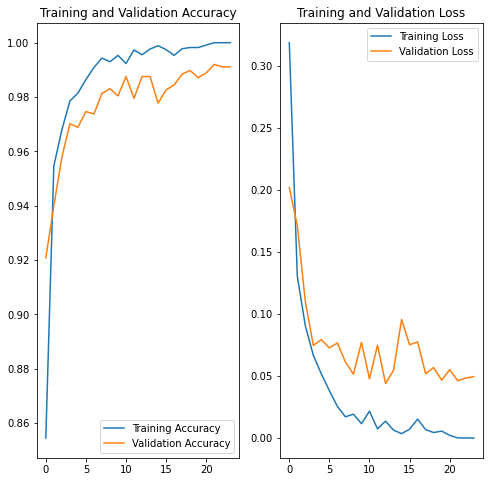

In [6]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epoc)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [15]:
data_path = 'MAFDataset/t1.jpg'
img = tf.keras.utils.load_img(
    data_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

img_array/=255


#img_array

In [16]:
predictions = model.predict(img_array)
score = predictions[0]
if(score>0.3):
    print("nomask")
else:
    print("mask")

print(score)

nomask
[0.68363386]


In [17]:
model.save("my_modelE64.h5", include_optimizer=False)

In [1]:
#import tensorflow as tf
from tensorflow.keras import models,utils
from tensorflow import expand_dims

batch_size = 32
img_height = 64
img_width = 64

new_model = models.load_model('my_modelE64.h5')

# Check its architecture
new_model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [10]:
data_path = 'MAFDataset/t4.jpg'
img = utils.load_img(
    data_path, target_size=(img_height, img_width)
)
img_array = utils.img_to_array(img)
img_array = expand_dims(img_array, 0) # Create a batch
img_array/=255

predictions = new_model.predict(img_array)
score = predictions[0]
if(score>0.3):
    print("nomask")
else:
    print("mask")

print(score)


mask
[5.59517e-17]


In [11]:
from struct import unpack
import os
import shutil
path = 'Test/'
path2 = 'Testout64/'

os.mkdir(path2)


files = os.listdir(path)
for file in files:
   # try:
        img = utils.load_img(
        path+file, target_size=(img_height, img_width)
        )
        img_array = utils.img_to_array(img)
        img_array = expand_dims(img_array, 0) # Create a batch
        img_array/=255

        predictions = new_model.predict(img_array)
        score = predictions[0]
        
        file_xml = int(file.split("_")[1])
        #if (file_xml<3) and (score>0.3):
        #    shutil.copyfile(path+file, path2+file)
            
        if (file_xml<3) == (score>0.3):
            shutil.copyfile(path+file, path2+file)
          
        
   # except:
        #f.close()
        #shutil.copyfile(path+file, path3+file) 
        #os.remove(path+file)